# Geometric Properties

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeos/geoai/blob/main/docs/examples/geometric_properties.ipynb)

This notebook demonstrates how to calculate geometric properties of objects in a vector dataset and filter out unwanted objects based on these properties.

## Install package
To use the `geoai-py` package, ensure it is installed in your environment. Uncomment the command below if needed.

In [ ]:
# %pip install geoai-py

## Import package

In [18]:
import geoai

## Load data

In [19]:
vector_url = "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/naip_buildings_masks.geojson"
raster_url = (
    "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/naip_train.tif"
)

In [20]:
gdf = geoai.read_vector(vector_url)

In [22]:
gdf.head()

confidence  class                                           geometry
0    0.994213      1  POLYGON ((455181.6 5277618.6, 455177.4 5277614...
1    0.992599      1  POLYGON ((454990.2 5277628.2, 454990.2 5277627...
2    0.989381      1  POLYGON ((454855.8 5277628.2, 454855.8 5277626...
3    0.986561      1  POLYGON ((454981.8 5277798, 454981.2 5277797.4...
4    0.982763      1  POLYGON ((455052 5277904.8, 455050.8 5277903.6...

from matplotlib import pyplot as plt
_df_4['confidence'].plot(kind='hist', bins=20, title='confidence')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['class']
  ys = series['confidence']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('class', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('class')
_ = plt.ylabel('confidence')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['class']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'class'}, axis=1)
              .sort_values('class', ascending=True))
  xs = counted['class']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('class', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('class')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_7['confidence'].plot(kind='line', figsize=(8, 4), title='confidence')
plt.gca().spines[['top', 'right']].set_visible(False)

## Visualize data

In [23]:
geoai.view_vector_interactive(gdf, column="confidence", tiles=raster_url)

## Add geometric properties

In [24]:
gdf_props = geoai.add_geometric_properties(gdf, area_unit="m2", length_unit="m")

In [25]:
gdf_props.head()

confidence  class                                           geometry  \
0    0.994213      1  POLYGON ((455181.6 5277618.6, 455177.4 5277614...   
1    0.992599      1  POLYGON ((454990.2 5277628.2, 454990.2 5277627...   
2    0.989381      1  POLYGON ((454855.8 5277628.2, 454855.8 5277626...   
3    0.986561      1  POLYGON ((454981.8 5277798, 454981.2 5277797.4...   
4    0.982763      1  POLYGON ((455052 5277904.8, 455050.8 5277903.6...   

   area_m2    length_m  perimeter_m  area_bbox_m2  area_convex_m2  \
0   184.50   53.407316    53.407316        241.92          189.18   
1   527.22   92.836753    92.836753        546.84          533.52   
2   599.40   97.988225    97.988225        617.40          604.44   
3   741.96  129.976450   129.976450        866.52          786.24   
4   748.98  130.122035   130.122035        876.96          795.78   

   area_filled_m2  major_length_m  minor_length_m  eccentricity  orientation  \
0          184.50            19.2            12.6      0.754544          0.0   
1          527.22            29.4            18.6      0.774435         90.0   
2          599.40            29.4            21.0      0.699854         90.0   
3          741.96            49.8            17.4      0.936975          0.0   
4          748.98            50.4            17.4      0.938515         90.0   

   elongation    extent  solidity  complexity  
0    1.523810  0.762649  0.975262    1.109169  
1    1.580645  0.964121  0.988192    1.140562  
2    1.400000  0.970845  0.991662    1.129043  
3    2.862069  0.856253  0.943681    1.346076  
4    2.896552  0.854064  0.941190    1.341253

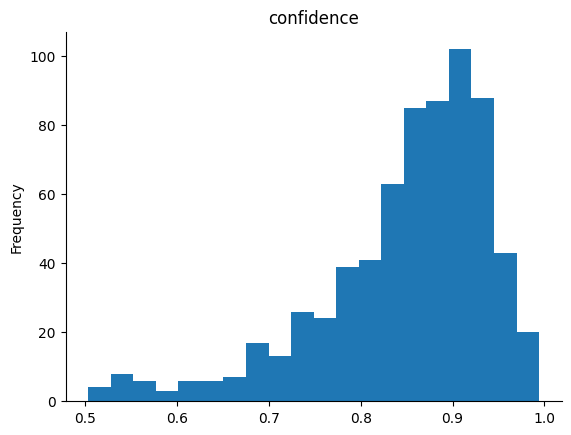

In [29]:
# @title confidence

from matplotlib import pyplot as plt
gdf_props['confidence'].plot(kind='hist', bins=20, title='confidence')
plt.gca().spines[['top', 'right',]].set_visible(False)



```
`# This is formatted as code`
```

## Visualize geometric properties

In [30]:
geoai.view_vector_interactive(gdf_props, column="area_m2", tiles=raster_url)

In [28]:
geoai.view_vector_interactive(gdf_props, column="elongation", tiles=raster_url)

## Filter objects based on geometric properties

In [32]:
gdf_filtered = gdf_props[(gdf_props["area_m2"] < 2000) & (gdf_props["elongation"] < 5)]

## Visualize filtered objects

In [31]:
geoai.view_vector_interactive(gdf_filtered, column="elongation", tiles=raster_url)